In [7]:
import numpy as np
import pylab as pl
import warnings
import math
from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from IPython.display import display, Image

### Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

**Диагональная, ортогональная, но не единичная(!):**

In [2]:
ortonormal_matrix = [[-1,0,0],
                     [ 0,1,0],
                     [ 0,0,-1]]
ortonormal_matrix = np.array(ortonormal_matrix)
print(ortonormal_matrix)
print('Проверка')
print(ortonormal_matrix @ ortonormal_matrix.T)

[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
Проверка
[[1 0 0]
 [0 1 0]
 [0 0 1]]


**Верхнетреугольная, ортогональная:**

Диагональная матрица является одновременно и верхнетреугольной и нижнетреугольной  
и только такая матрица может быть одновременно ортогональной  
Покажем это на примере матрицы 3Х3

Пусть матрица имеет вид:  

   a b c  
   0 d e  
   0 0 f  

Такая матрица является верхнетреугольной по определению. Т.к. она одновременно ортогональная, то  
a^2 + b^2 + c^2 = 1
d^2 + e^2 = 1
f^2 = 1
bd + ce = 0  
ef = 0  
cf = 0  
Поскольку f = +-1, то e = 0 и c = 0, следовательно в = +- 1 и следовательно b = 0.  
Таким образом треугольная матрица может быть ортогональной в случае когда она вырождена до диагональной матрицы, где на главной оси стоят элементы равные +-1.

In [3]:
top_triangle_matrix = [[-1,0,0],
                      [ 0,-1,0],
                      [ 0,0,-1]]
top_triangle_matrix = np.array(top_triangle_matrix)
print(top_triangle_matrix)
print('Проверка')
print(top_triangle_matrix @ top_triangle_matrix.T)

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
Проверка
[[1 0 0]
 [0 1 0]
 [0 0 1]]


**Нижнетреугольная, ортогональная:**

In [4]:
bottom_triangle_matrix = [[1,0,0],
                      [ 0,-1,0],
                      [ 0,0,-1]]
bottom_triangle_matrix = np.array(bottom_triangle_matrix)
print(bottom_triangle_matrix)
print('Проверка')
print(bottom_triangle_matrix @ bottom_triangle_matrix.T)

[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
Проверка
[[1 0 0]
 [0 1 0]
 [0 0 1]]


**Матрица, у которой определитель = 1, и все элементы не равны 0:**

In [6]:
det_matrix = [[1,1],
              [1,2]]
det_matrix = np.array(det_matrix)
det = np.linalg.det(det_matrix)
print(det_matrix)
print(det)

[[1 1]
 [1 2]]
1.0


P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [30]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


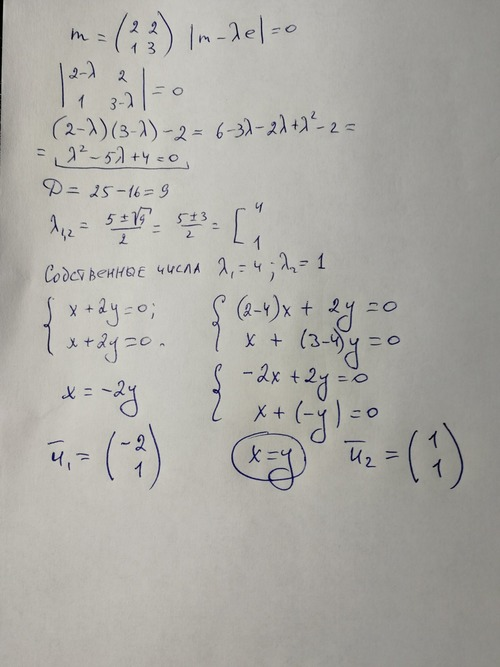

In [10]:
Image('mat_one.jpg')

In [41]:
w, v = np.linalg.eig(m)

array([-0.89442719,  0.4472136 ])

In [66]:
own_number = []
own_vector = []
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор ", v[:,i])

Собственное значение 1.0
соответствующий ему собственный вектор  [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор  [-0.70710678 -0.70710678]


Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [72]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


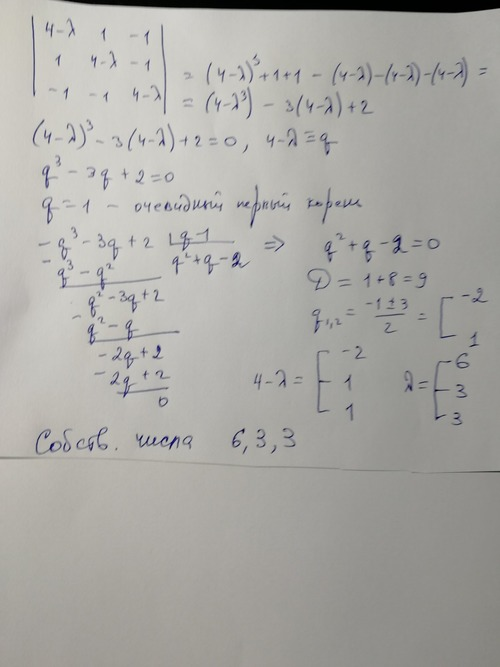

In [71]:
Image('mat_two.jpg')

In [73]:
w, v = np.linalg.eig(m)

In [74]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор ", v[:,i])

Собственное значение 2.999999999999999
соответствующий ему собственный вектор  [-0.81649658  0.40824829 -0.40824829]
Собственное значение 5.999999999999997
соответствующий ему собственный вектор  [ 0.57735027  0.57735027 -0.57735027]
Собственное значение 2.9999999999999996
соответствующий ему собственный вектор  [-0.27658128  0.8035929   0.52701162]


### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [86]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [87]:
#Даже на такой маленькой матрице здесь будет довольно затруднительно искать собственные вектора,  
#т.к. собственные числа равны:
print(2+math.sqrt(5),' и', 2-math.sqrt(5))

4.23606797749979  и -0.2360679774997898


In [95]:
w, v = np.linalg.eig(m)

In [96]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор ", v[:,i])

Собственное значение -0.2360679774997898
соответствующий ему собственный вектор  [-0.85065081  0.52573111]
Собственное значение 4.23606797749979
соответствующий ему собственный вектор  [-0.52573111 -0.85065081]


In [97]:
np.diag(w)

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

Собственные числа совпали

In [103]:
print(v @ np.diag(w) @ v.T)

[[1. 2.]
 [2. 3.]]


### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [104]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [105]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [106]:
X, y = load_digits(return_X_y=True)

In [107]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


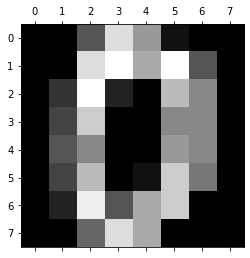

In [117]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [109]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.5152668951035309

In [110]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.7974401780745687

In [129]:
response = []
count = []
i = 1
while i <= 25:
    svd = TruncatedSVD(n_components=i)
    X_reduced = svd.fit_transform(X)
    svd.explained_variance_ratio_.sum()
    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    response.append(rf_reduced.oob_score_)
    count.append(i)
    i += 1

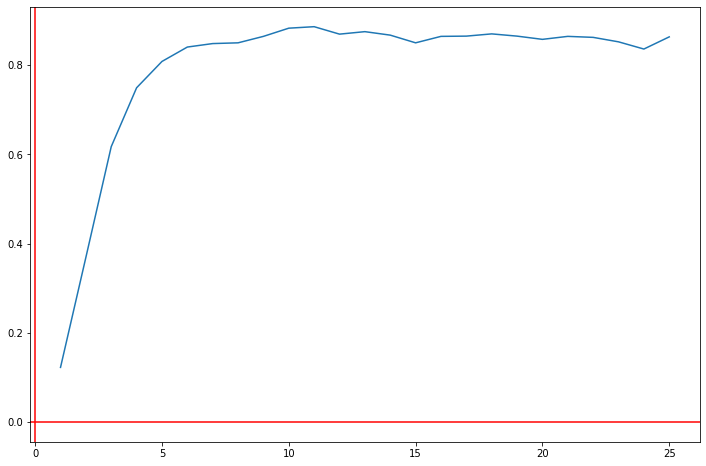

In [130]:
plt.figure(figsize=(12, 8))


plt.plot(count,response)
plt.axvline(0, color='r')
plt.axhline(0, color='r')

plt.show()